In [39]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
#matplotlib.rc('font', **font)
cstring = 'rgbcmyk'
import matplotlib as ml
%matplotlib inline
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (8.0, 5.0)
ml.rcParams['text.usetex'] =True
ml.rc('font', family='serif',size=16)

In [40]:
g0 = 3100
g1 = 380
g3 = 290
g4 = 141
Dtp = 10.5

In [41]:
pauli0=np.eye(2)
pauli1=np.array([[0,1],[1,0]])
pauli2=np.array([[0,-1j],[1j,0]])
pauli3=np.array([[1,0],[0,-1]])

def getBMatrixAB(kx, ky, Dt, mu, xi):
    v0 = -0.5 * np.sqrt(3) * g0
    v3 = -0.5 * np.sqrt(3) * g3
    v4 = -0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(Dt - mu)*idt, v0*pc, -v4*pc, -v3*p],
                   [v0*p, (Dt + Dtp - mu)*idt, g1*idt, -v4*pc],
                   [-v4*p, g1*idt, (-Dt + Dtp - mu)*idt, v0*pc],
                   [-v3*pc, -v4 * p, v0*p, (-Dt - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

In [42]:
mult=2*9.1*2.46*3.34*1.6*1e-5/1.05**2

def gAB(xi,xy):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    if xy:
        iB = mult*1j
    else:
        iB=mult*xi
    iBc = np.conj(iB)
    Hl = np.array([[0, v0*iB, 0, 0],
                   [v0*iBc, 0, 0, 0],
                   [0, 0, 0, -v0*iB],
                   [0, 0, -v0*iBc, 0]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

def v(xi,xy):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    if xy:
        p = xi
        pc = xi
    else:
        p = 1j
        pc = -1j
    Hl = np.array([[0, v0*pc, -v4*pc, -v3*p],
                   [v0*p, 0, 0, -v4*pc],
                   [-v4*p, 0, 0, v0*pc],
                   [-v3*pc, -v4*p, v0*p, 0]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

In [66]:
Dl=80
kx=np.linspace(-0.1,0.1,200)
ky=np.zeros(kx.shape)
w,v=np.linalg.eigh(getBMatrixAB(kx, ky, Dl, 0.0, 1))

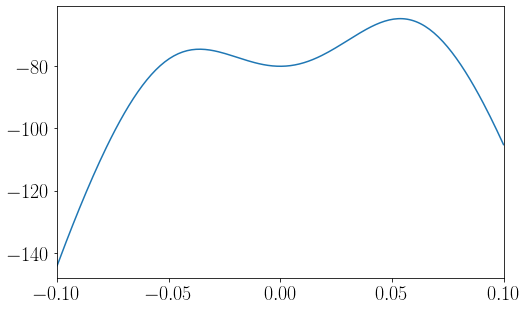

In [67]:
ml.rcParams['figure.figsize'] = (8.0, 5.0)
plt.plot(kx, w[:,1])
#plt.plot(kx, np.einsum('ik, kl, il->i', np.conj(v[:,:,2]), gy, v[:,:,2]),'r')
#plt.ylim([-1,1])
plt.xlim([-0.1,0.1])
plt.show()

In [43]:
gx=gAB(1,True)
gy=gAB(1,False)
vx=v(1,True)
vy=v(1,False) 

In [87]:
kr = np.linspace(-0.15,0.15, 800)
Dl=60
KX, KY = np.meshgrid(kr, kr)
w0, v0 = np.linalg.eigh(getBMatrixAB(KX, KY, Dl, 0.0, 1))

In [88]:
gxMh = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,1]), gx, v0[:,:,:,1])
gyMh = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,1]), gy, v0[:,:,:,1])
gxMe = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,2]), gx, v0[:,:,:,2])
gyMe = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,2]), gy, v0[:,:,:,2])

vxh = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,1]), vx, v0[:,:,:,1])
vyh = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,1]), vy, v0[:,:,:,1])
vxe = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,2]), vx, v0[:,:,:,2])
vye = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,2]), vy, v0[:,:,:,2])

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of th

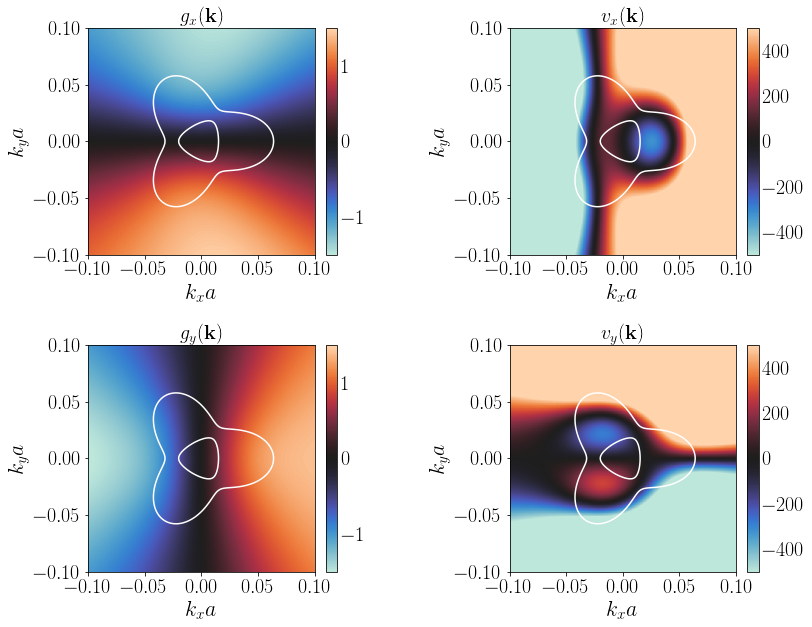

In [90]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ml.rc('font', family='serif',size=20)
ml.rcParams['figure.figsize'] = (12.0, 10)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 2)
gs.update(wspace=0.7, hspace=0.4)

import seaborn as sns
cmap2=sns.color_palette("icefire", as_cmap=True)

Dl=60
ns=-1.1
ax1 = fig.add_subplot(gs[0, 0])
ind = np.where(np.abs(Dl-DlistAB)<0.01)[0][0]
pc1=ax1.pcolormesh(KX,KY,np.real(gxMh),rasterized=True,vmin=-1.5,vmax=1.5,cmap=cmap2)
ax1.contour(KX, KY, w0[:,:,1],[fend[ind](ns)],colors='w')
axins = inset_axes(ax1, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=0)
cbar1=plt.colorbar(pc1, cax=axins)
cbar1.ax.tick_params(size=0)
ax1.set_xlabel(r'$k_xa$',fontsize=22)
ax1.set_ylabel(r'$k_ya$',fontsize=22)
ax1.set_yticks([-0.1,-0.05,0,0.05,0.1])
ax1.set_xticks([-0.1,-0.05,0,0.05,0.1])
ax1.set_ylim([-0.1,0.1])
ax1.set_xlim([-0.1,0.1])
ax1.set(adjustable='box', aspect='equal')
ax1.set_title(r"$g_x(\mathbf{k})$",fontsize=20)

ax2 = fig.add_subplot(gs[1, 0])
pc2=ax2.pcolormesh(KX,KY,np.real(gyMh),rasterized=True,vmin=-1.5,vmax=1.5,cmap=cmap2)
ax2.contour(KX, KY, w0[:,:,1],[fend[ind](ns)],colors='w')
axins = inset_axes(ax2, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0)
cbar2=plt.colorbar(pc2, cax=axins)
cbar2.ax.tick_params(size=0)
ax2.set_xlabel(r'$k_xa$',fontsize=22)
ax2.set_ylabel(r'$k_ya$',fontsize=22)
ax2.set_yticks([-0.1,-0.05,0,0.05,0.1])
ax2.set_xticks([-0.1,-0.05,0,0.05,0.1])
ax2.set_ylim([-0.1,0.1])
ax2.set_xlim([-0.1,0.1])
ax2.set(adjustable='box', aspect='equal')
ax2.set_title(r"$g_y(\mathbf{k})$",fontsize=20)


ax3 = fig.add_subplot(gs[0, 1])
pc3=ax3.pcolormesh(KX,KY,np.real(vxh),rasterized=True,vmin=-500,vmax=500,cmap=cmap2)
ax3.contour(KX, KY, w0[:,:,1],[fend[ind](ns)],colors='w')
axins = inset_axes(ax3, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax3.transAxes,
                   borderpad=0)
cbar3=plt.colorbar(pc3, cax=axins)
cbar3.ax.tick_params(size=0)
ax3.set_xlabel(r'$k_xa$',fontsize=22)
ax3.set_ylabel(r'$k_ya$',fontsize=22)
ax3.set_yticks([-0.1,-0.05,0,0.05,0.1])
ax3.set_xticks([-0.1,-0.05,0,0.05,0.1])
ax3.set_ylim([-0.1,0.1])
ax3.set_xlim([-0.1,0.1])
ax3.set(adjustable='box', aspect='equal')
ax3.set_title(r"$v_x(\mathbf{k})$",fontsize=20)

ax4 = fig.add_subplot(gs[1, 1])
pc4=ax4.pcolormesh(KX,KY,np.real(vyh),rasterized=True,vmin=-500,vmax=500,cmap=cmap2)
ax4.contour(KX, KY, w0[:,:,1],[fend[ind](ns)],colors='w')
axins = inset_axes(ax4, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax4.transAxes,
                   borderpad=0)
cbar4=plt.colorbar(pc4, cax=axins)
cbar4.ax.tick_params(size=0)
ax4.set_xlabel(r'$k_xa$',fontsize=22)
ax4.set_ylabel(r'$k_ya$',fontsize=22)
ax4.set_yticks([-0.1,-0.05,0,0.05,0.1])
ax4.set_xticks([-0.1,-0.05,0,0.05,0.1])
ax4.set_ylim([-0.1,0.1])
ax4.set_xlim([-0.1,0.1])
ax4.set(adjustable='box', aspect='equal')
ax4.set_title(r"$v_y(\mathbf{k})$",fontsize=20)

plt.tight_layout()
plt.savefig('gv.pdf',dpi=200)

In [49]:
dpath = "/home/aghazary/Documents/StonerBilayerData/"
with open(dpath+'U0.0KV0.0KDataABGrapheneABC.npy', 'rb') as f:
    a4AB = np.load(f)
dmu = 0.002
DlistAB =np.arange(0,120.1,0.5)
mulAB = np.arange(-150,150.0001,dmu)
mulAB = mulAB[1:-1]
nuTAB = a4AB[:,1:-1]
dosAB = (a4AB[:,2:]-a4AB[:,0:-2]) / (2*dmu)
fend = np.array([interp1d(nuTAB[i], mulAB, kind='linear') for i in range(len(nuTAB))])

In [7]:
Dl=100
kr, st = np.linspace(-0.1,0.1, 1500,retstep=True)
KX, KY = np.meshgrid(kr, kr)
w0, v0 = np.linalg.eigh(getBMatrixAB(KX, KY, Dl, 0.00, 1))

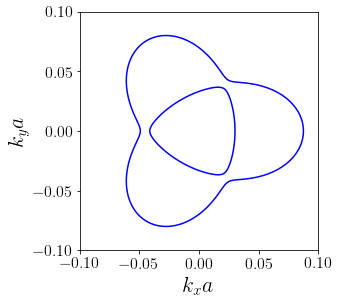

In [8]:
ml.rcParams['contour.negative_linestyle']= 'solid'
ind = np.where(np.abs(Dl-DlistAB)<0.01)[0][0]
ml.rcParams['figure.figsize'] = (5, 5)
fig, ax = plt.subplots(1,1)
ax.contour(KX, KY, w0[:,:,1],[fend[ind](-2.0)],colors='b')
ax.set_xlabel(r'$k_xa$',fontsize=22)
ax.set_ylabel(r'$k_ya$',fontsize=22)
ax.set(adjustable='box', aspect='equal')
#ax.set_xlim([-0.027,0.027])
#ax.set_ylim([-0.027,0.027])
plt.tight_layout()
#plt.savefig('FS.pdf')

In [23]:
T=0.025
mu = fend[ind](-1.1)
Dosl=(4*st**2*1e4/((2*np.pi*2.46)**2*4*T))*(1/np.cosh((-w0[:,:,1]+mu)/(2*T))**2)
indl = np.where((np.abs(KX)<0.025)&(np.abs(KY)<0.025))
indl1 = np.where(((np.abs(KX)>=0.025)|(np.abs(KY)>=0.025)))
print(np.sum(Dosl[indl[0],indl[1]]))
print(np.sum(Dosl[indl1[0],indl1[1]]))
print(np.sum(Dosl[indl[0],indl[1]])+np.sum(Dosl[indl1[0],indl1[1]]))
print(np.sum(Dosl))

0.10887936619750069
0.1328963062962273
0.241775672493728
0.24177567249372806


/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
T=0.025
mu = fend[ind](-1.1)
Dosl=(4*st**2*1e4/((2*np.pi*2.46)**2*4*T))*(1/np.cosh((-w0[:,:,1]+mu)/(2*T))**2)
indl = np.where(np.sqrt(KX**2+KY**2)<0.5*np.max(kxlri[:,1])+0.5*np.min(kxlro[:,1]))
indl1 = np.where(np.sqrt(KX**2+KY**2)>=0.5*np.max(kxlri[:,1])+0.5*np.min(kxlro[:,1]))
print(np.sum(Dosl[indl[0],indl[1]]))
print(np.sum(Dosl[indl1[0],indl1[1]]))
print(np.sum(Dosl[indl[0],indl[1]])+np.sum(Dosl[indl1[0],indl1[1]]))
print(np.sum(Dosl))

0.17536629401599255
0.20318788262632356
0.3785541766423161
0.378554176642316


/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
fdt[ind](-1.1)

array(0.38090283)

In [44]:
fdt = np.array([interp1d(nuTAB[i], dosAB[i], kind='linear') for i in range(len(nuTAB))])

In [70]:
from scipy import optimize
def func(k,th, Dt1, mu):
    w =np.linalg.eigvalsh(getBMatrixAB(k*np.cos(th), k*np.sin(th), Dt1, mu, 1))
    return w[1]

def catch(func, *args, **kwargs):
    try:
        return func(*args, **kwargs)
    except RuntimeError:
        return None
    except ValueError:
        return None

In [91]:
Dl=60
ind = np.where(np.abs(Dl-DlistAB)<0.01)[0][0]
muc=fend[ind](-1.1)

In [92]:
NFS=400
thr = np.linspace(-np.pi,np.pi,NFS,endpoint=False)
kmax = 0.1
kxlro = np.array([[th, catch(optimize.newton, lambda k:func(k,th, Dl, muc), 1.2*kmax)] for th in thr])
kxlri = np.array([[th[0],catch(optimize.brentq,lambda k:func(k,th[0], Dl, muc), 0.00002, th[1]-0.00001)] for th in kxlro])

In [38]:
np.min(kxlro[:,1])

0.02973839130890873

In [39]:
np.max(kxlri[:,1])

0.028172201777581778

In [50]:
np.any(kxlri[:,1]==None)

False

In [93]:
kxlo=kxlro[:,1]*np.cos(kxlro[:,0])
kylo=kxlro[:,1]*np.sin(kxlro[:,0])
kxli=kxlri[:,1]*np.cos(kxlri[:,0])
kyli=kxlri[:,1]*np.sin(kxlri[:,0])
kxl = np.concatenate((kxlo, kxli))
kyl = np.concatenate((kylo, kyli))

In [94]:
w0, v0 = np.linalg.eigh(getBMatrixAB(kxl, kyl, Dl, 0.0, 1))
gxMh = np.einsum('ik, kl, il->i', np.conj(v0[:,:,1]), gx, v0[:,:,1])
gyMh = np.einsum('ik, kl, il->i', np.conj(v0[:,:,1]), gy, v0[:,:,1])

vxh = np.einsum('ik, kl, il->i', np.conj(v0[:,:,1]), vx, v0[:,:,1])
vyh = np.einsum('ik, kl, il->i', np.conj(v0[:,:,1]), vy, v0[:,:,1])

In [95]:
Sz = np.diag([1,1,-1,-1])
SzM = np.einsum('ik, kl, il->i', np.conj(v0[:,:,1]), Sz, v0[:,:,1])
S0 = np.diag([1,1,1,1])
S0M = np.einsum('ik, kl, il->i', np.conj(v0[:,:,1]), S0, v0[:,:,1])
SzM = SzM / S0M

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


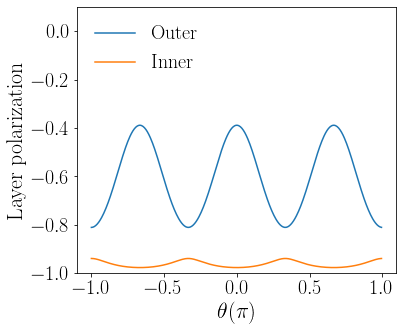

In [96]:
ml.rcParams['contour.negative_linestyle']= 'solid'
ml.rcParams['figure.figsize'] = (6, 5)
fig, ax = plt.subplots(1,1)
ax.plot(thr/np.pi, SzM[:NFS],label="Outer")
ax.plot(thr/np.pi, SzM[NFS:],label="Inner")
ax.set_xlabel(r'$\theta(\pi)$',fontsize=22)
ax.set_ylabel('Layer polarization',fontsize=22)
ax.set_ylim([-1.0,0.1])
plt.legend(frameon=False,loc='upper left')
plt.tight_layout()
plt.savefig('LayerPol.pdf')

In [97]:
gp = gxMh+gyMh*1j
gm = gxMh-gyMh*1j
vp = vxh+vyh*1j
vm = vxh-vyh*1j

In [98]:
def ql(n,qp,thr):
    return (1/len(thr))*np.sum(np.exp(-(3*n+1)*thr*1j)*qp)

In [57]:
ql(6,vp[:NFS],thr)

(0.029099678291673856-1.375610736431554e-13j)

In [99]:
nl = np.arange(-5,6,1)
gno=np.array(list(map(lambda n: ql(n,gp[:NFS],thr), nl)))
vno=np.array(list(map(lambda n: ql(n,vp[:NFS],thr), nl)))
gni=np.array(list(map(lambda n: ql(n,gp[NFS:],thr), nl)))
vni=np.array(list(map(lambda n: ql(n,vp[NFS:],thr), nl)))
gn = np.concatenate((gno,gni))
vn = np.concatenate((vno,vni))

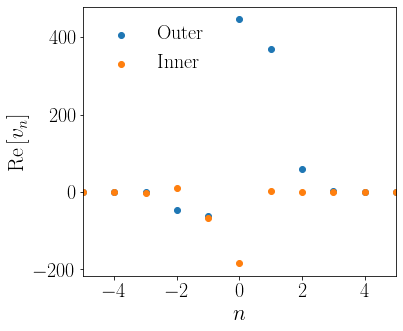

In [100]:
ml.rcParams['contour.negative_linestyle']= 'solid'
ml.rcParams['figure.figsize'] = (6, 5)
fig, ax = plt.subplots(1,1)
ax.scatter(nl,np.real(vno),label="Outer")
ax.scatter(nl,np.real(vni),label="Inner")
ax.set_xlabel(r'$n$',fontsize=22)
ax.set_ylabel(r'$\mathrm{Re}\left[v_n\right]$',fontsize=22)
ax.set_xlim([-5,5])
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('vn.pdf')

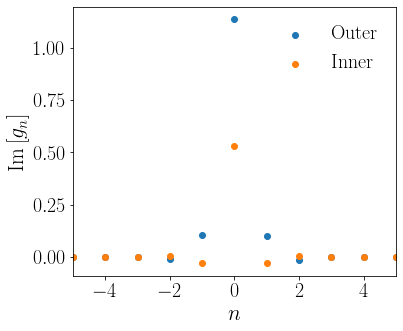

In [101]:
ml.rcParams['contour.negative_linestyle']= 'solid'
ml.rcParams['figure.figsize'] = (6, 5)
fig, ax = plt.subplots(1,1)
ax.scatter(nl,np.imag(gno),label="Outer")
ax.scatter(nl,np.imag(gni),label="Inner")
ax.set_xlabel(r'$n$',fontsize=22)
ax.set_ylabel(r'$\mathrm{Im}\left[g_n\right]$',fontsize=22)
ax.set_xlim([-5,5])
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('gn.pdf')

In [67]:
def Free(qx, qy, Bx, By, gn, vn):
    qp = qx+qy*1j
    Bp = Bx+By*1j
    Ipp = np.sum((np.conj(qp)*vn+2*np.conj(Bp)*gn)*(qp*np.conj(vn)+2*Bp*np.conj(gn)))
    Ipm = np.sum((qp*np.conj(vn)+2*Bp*np.conj(gn))*(qp*np.flip(np.conj(vn))+2*Bp*np.flip(np.conj(gn))))
    Imp = np.sum((np.conj(qp)*vn+2*np.conj(Bp)*gn)*(np.conj(qp)*np.flip(vn)+2*np.conj(Bp)*np.flip(gn)))
    return np.array([2*np.real(Ipp),np.real(2*Ipp - np.sqrt(Ipm*Imp))])

In [343]:
Free(0.01,0,0.6,0.1,gn,vn)

array([50.32158823, 25.62461745])

(0.0, 2000.0)

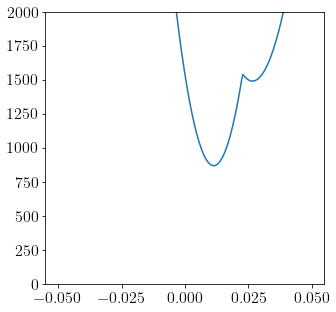

In [69]:
qx = np.linspace(-0.05,0.05,200)
plt.plot(qx, np.array([Free(qxl,-qxl,6.0,6.0,gn,vn)[1] for qxl in qx]))
plt.ylim([0,2000])

In [70]:
from itertools import starmap
qx = np.linspace(-0.03,0.03,600)
QX, QY=np.meshgrid(qx,qx)
QS = np.reshape(np.moveaxis(np.array([QX,QY]),0,-1), (-1,2))

def getMin(Bx, By):
    RS = np.array(list(starmap(lambda x, y: Free(x,y,Bx,By,gn,vn), QS)))
    indmins = np.argmin(RS[:,0])
    indminp = np.argmin(RS[:,1])
    return np.array([QS[indmins][0], QS[indmins][1], RS[indmins,0], QS[indminp][0], QS[indminp][1], RS[indminp,1]])

def getMinL(B):
    return getMin(B,B)

In [71]:
Z3 = 1.20206
mult = 7*Z3/(16*4*np.pi**2)

In [72]:
from multiprocessing import Pool
pool = Pool(processes=4)
Bl = np.linspace(0,6.0,20)

Min = np.array(pool.map(getMinL, Bl))
Minq0 = np.array(list(map(lambda x: Free(0,0,x,x,gn,vn), Bl)))

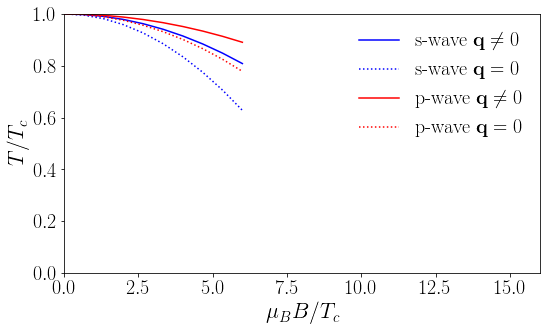

In [42]:
ml.rc('font', family='serif',size=20)
plt.plot(Bl, 1-mult*Min[:,2],'b-', label=r's-wave $\mathbf{q}\neq0$')
plt.plot(Bl, 1-mult*Minq0[:,0],'b:',label=r's-wave $\mathbf{q}=0$')
plt.plot(Bl, 1-mult*Min[:,5],'r-',label=r'p-wave $\mathbf{q}\neq0$')
plt.plot(Bl, 1-mult*Minq0[:,1],'r:',label=r'p-wave $\mathbf{q}=0$')
plt.ylim([0.0,1.0001])
plt.ylabel(r'$T/T_c$',fontsize=22)
plt.xlabel(r'$\mu_B B/T_c$',fontsize=22)
plt.xlim([0,16])
plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig('TBDep.pdf')

In [34]:
Min.shape

(10, 6)

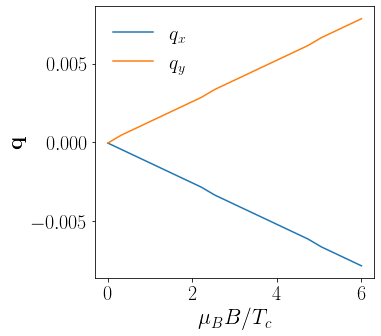

In [70]:
plt.plot(Bl, Min[:,0],label='$q_x$')
plt.plot(Bl, Min[:,1],label='$q_y$')
plt.ylabel(r'$\mathbf{q}$',fontsize=22)
plt.xlabel(r'$\mu_B B/T_c$',fontsize=22)
plt.legend(frameon=False)

In [41]:
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Min[:,5], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Min[:,2], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Minq0[:,1], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Minq0[:,0], 2)[-1])

0.0030380602194521743
0.005319587086548982
0.006154141069617478
0.010331449134562135


In [44]:
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Min[:,5], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Min[:,2], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Minq0[:,1], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Minq0[:,0], 2)[-1])

0.0030378029359167265
0.0053195471896938205
0.006154141069617442
0.010331449134562121


In [54]:
Bl = np.linspace(0,16.0,100)

In [45]:
TcB.shape

(100, 6)

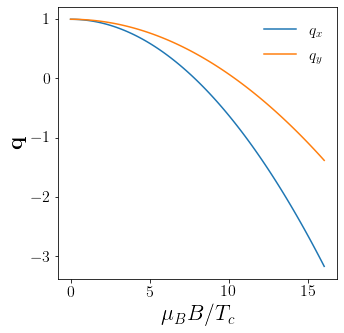

In [55]:
plt.plot(Bl, TcB[:,2],label='$q_x$')
plt.plot(Bl, TcB[:,5],label='$q_y$')
plt.ylabel(r'$\mathbf{q}$',fontsize=22)
plt.xlabel(r'$\mu_B B/T_c$',fontsize=22)
plt.legend(frameon=False)

In [127]:
dpath = "/home/aghazary/Documents/MyWorks/BilayerGraphene/PythonCode/Orbital/"
Tl = np.linspace(0,2*np.pi,200)
with open(dpath+'TcDepThB6.npy', 'rb') as f:
    TcB = np.load(f)

In [58]:
AngS = np.array([np.arctan2(TcBl[1],TcBl[0]) if np.arctan2(TcBl[1],TcBl[0])>0 else np.arctan2(TcBl[1],TcBl[0])+2*np.pi for TcBl in TcB])
AngP = np.array([np.arctan2(TcBl[4],TcBl[3]) if np.arctan2(TcBl[4],TcBl[3])>0 else np.arctan2(TcBl[4],TcBl[3])+2*np.pi for TcBl in TcB])

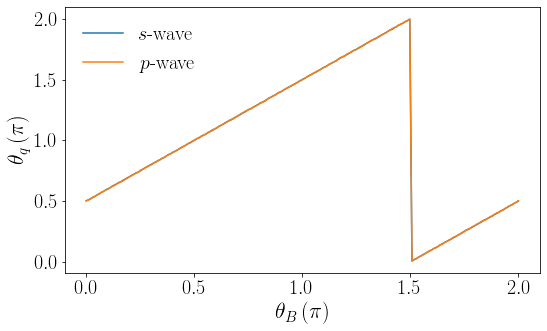

In [62]:
ml.rcParams['figure.figsize'] = (8, 5)
ml.rc('font', family='serif',size=20)
plt.plot(Tl/np.pi, AngS/np.pi,label='$s$-wave')
plt.plot(Tl/np.pi, AngP/np.pi,label='$p$-wave')
plt.ylabel(r'$\theta_q \left(\pi\right)$',fontsize=22)
plt.xlabel(r'$\theta_B \left(\pi\right)$',fontsize=22)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('OrbitalFieldAngleDep.pdf')

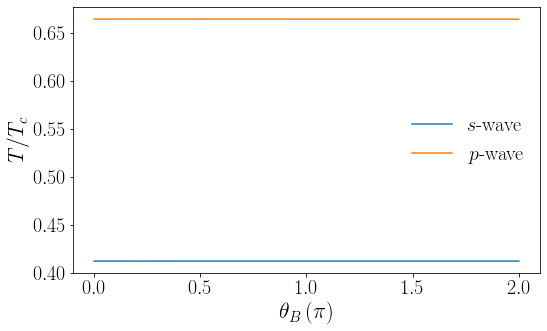

In [64]:
ml.rcParams['figure.figsize'] = (8, 5)
ml.rc('font', family='serif',size=20)
plt.plot(Tl/np.pi, TcB[:,2],label='$s$-wave')
plt.plot(Tl/np.pi, TcB[:,5],label='$p$-wave')
plt.ylabel(r'$T/T_c$',fontsize=22)
plt.xlabel(r'$\theta_B \left(\pi\right)$',fontsize=22)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('TTcAngleDep.pdf')

In [114]:
Dl = np.linspace(0,80,41)
Bl = np.linspace(0,6.0,11)

In [115]:
ls = np.reshape(np.moveaxis(np.array(np.meshgrid(Dl,Bl)),[0],[-1]),(-1,2))

In [132]:
TcB=np.concatenate((ls,TcB),axis=1)

In [121]:
lsl = np.moveaxis(np.array(np.meshgrid(Dl,Bl)),[0],[-1])

In [134]:
np.reshape(TcB, (lsl.shape[0],lsl.shape[1],-1)).shape

(11, 3, 8)

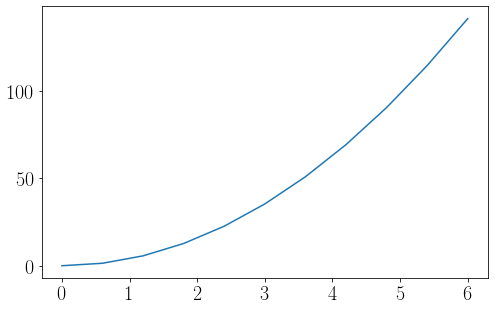

In [102]:
plt.plot(TcB0[:,20,1],TcB0[:,20,2])

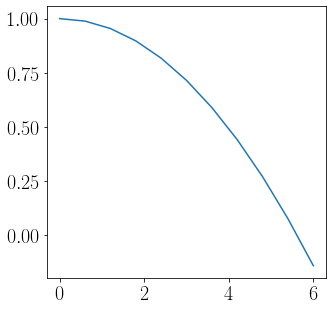

In [146]:
plt.plot(TcB[:,10,1],TcB[:,10,2])

(70.0, 80.0)

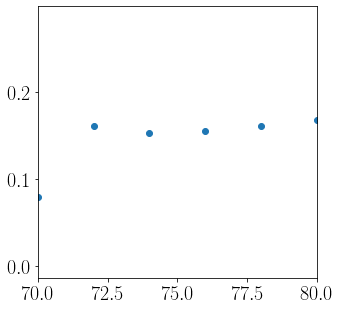

In [131]:
plt.scatter(alpp0[:,0],alpp0[:,1])
plt.xlim([70,80])

In [120]:
dpath = "/home/aghazary/Documents/MyWorks/BilayerGraphene/PythonCode/Orbital/"
with open(dpath+'TcDepThB0Dl60num11Bilayer.npy', 'rb') as f:
    TcB0 = np.load(f)
with open(dpath+'TcDepThBDl60num11Bilayer.npy', 'rb') as f:
    TcB = np.load(f)

In [121]:
alps = np.array([[TcB[0,i,0],-np.polynomial.polynomial.polyfit(TcB[:,i,1], TcB[:,i,4], 2)[-1]] for i in range(TcB.shape[1])])
alpp = np.array([[TcB[0,i,0],-np.polynomial.polynomial.polyfit(TcB[:,i,1], TcB[:,i,7], 2)[-1]] for i in range(TcB.shape[1])])
alps0 = np.array([[TcB0[0,i,0],-np.polynomial.polynomial.polyfit(TcB0[:,i,1], TcB0[:,i,2], 2)[-1]] for i in range(TcB0.shape[1])])
alpp0 = np.array([[TcB0[0,i,0],-np.polynomial.polynomial.polyfit(TcB0[:,i,1], TcB0[:,i,3], 2)[-1]] for i in range(TcB0.shape[1])])

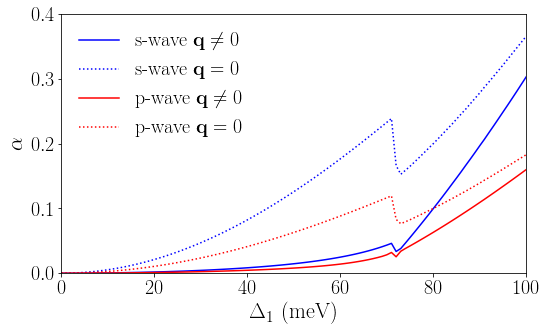

In [112]:
ml.rcParams['figure.figsize'] = (8, 5)
ml.rc('font', family='serif',size=20)
plt.plot(alps[:,0],alps[:,1],'b-', label=r's-wave $\mathbf{q}\neq0$')
plt.plot(alps0[:,0],alps0[:,1],'b:',label=r's-wave $\mathbf{q}=0$')
plt.plot(alpp[:,0],alpp[:,1],'r-',label=r'p-wave $\mathbf{q}\neq0$')
plt.plot(alpp0[:,0],alpp0[:,1],'r:',label=r'p-wave $\mathbf{q}=0$')

plt.ylim([0,0.4])
plt.ylabel(r'$\alpha$',fontsize=22)
plt.xlabel(r'$\Delta_1\,\left(\mathrm{meV}\right)$',fontsize=22)
plt.xlim([0,100])
plt.legend(frameon=False)
plt.tight_layout()

plt.savefig('AlDepDeltaBilayer.pdf')

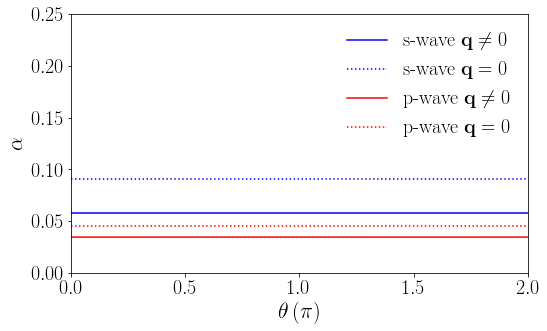

In [124]:
ml.rcParams['figure.figsize'] = (8, 5)
ml.rc('font', family='serif',size=20)
plt.plot(alps[:,0]/np.pi,alps[:,1],'b-', label=r's-wave $\mathbf{q}\neq0$')
plt.plot(alps0[:,0]/np.pi,alps0[:,1],'b:',label=r's-wave $\mathbf{q}=0$')
plt.plot(alpp[:,0]/np.pi,alpp[:,1],'r-',label=r'p-wave $\mathbf{q}\neq0$')
plt.plot(alpp0[:,0]/np.pi,alpp0[:,1],'r:',label=r'p-wave $\mathbf{q}=0$')

plt.ylim([0.0,0.25])
plt.ylabel(r'$\alpha$',fontsize=22)
plt.xlabel(r'$\theta\left(\pi\right)$',fontsize=22)
plt.xlim([0,2])
plt.legend(frameon=False)
plt.tight_layout()

plt.savefig('AlDepThnm11Bilayer.pdf')

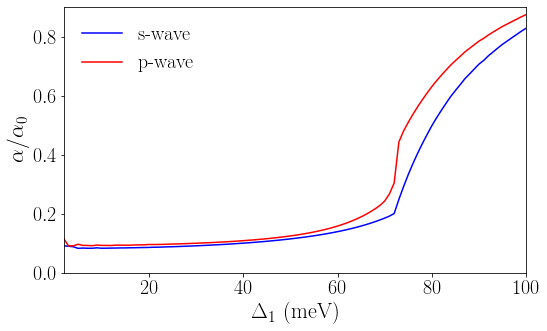

In [113]:
ml.rcParams['figure.figsize'] = (8, 5)
ml.rc('font', family='serif',size=20)
plt.plot(alps[:,0],alps[:,1]/alps0[:,1],'b-', label=r's-wave')
#plt.plot(alps0[:,0],alps0[:,1],'b:',label=r's-wave $\mathbf{q}=0$')
plt.plot(alpp[:,0],alpp[:,1]/alpp0[:,1],'r-',label=r'p-wave')
#plt.plot(alpp0[:,0],alpp0[:,1],'r:',label=r'p-wave $\mathbf{q}=0$')

plt.ylim([0.0,0.9])
plt.ylabel(r'$\alpha/\alpha_0$',fontsize=22)
plt.xlabel(r'$\Delta_1\,\left(\mathrm{meV}\right)$',fontsize=22)
plt.xlim([2,100])
plt.legend(frameon=False)
plt.tight_layout()

plt.savefig('AlAl0DepDeltaBilayer.pdf')

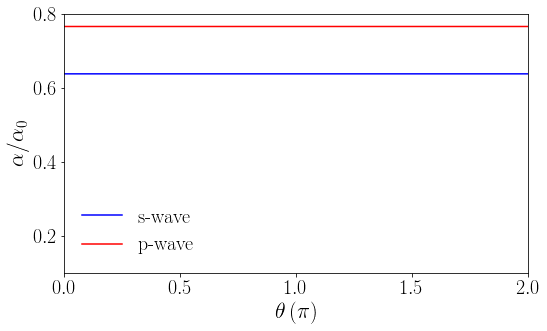

In [125]:
ml.rcParams['figure.figsize'] = (8, 5)
ml.rc('font', family='serif',size=20)
plt.plot(alps[:,0]/np.pi,alps[:,1]/alps0[:,1],'b-', label=r's-wave')
#plt.plot(alps0[:,0],alps0[:,1],'b:',label=r's-wave $\mathbf{q}=0$')
plt.plot(alpp[:,0]/np.pi,alpp[:,1]/alpp0[:,1],'r-',label=r'p-wave')
#plt.plot(alpp0[:,0],alpp0[:,1],'r:',label=r'p-wave $\mathbf{q}=0$')

plt.ylim([0.1,0.8])
plt.ylabel(r'$\alpha/\alpha_0$',fontsize=22)
plt.xlabel(r'$\theta\left(\pi\right)$',fontsize=22)
plt.xlim([0,2])
plt.legend(frameon=False)
plt.tight_layout()

plt.savefig('AlAl0DepThnm11Bilayer.pdf')

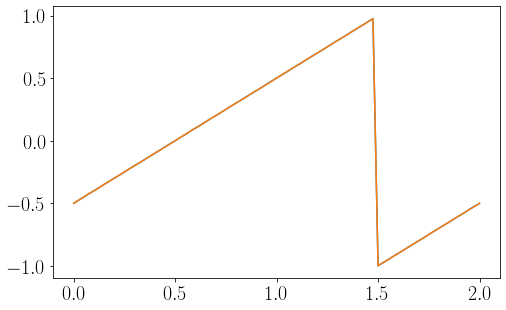

In [74]:
plt.plot(TcB[-1,:,0]/np.pi,np.arctan2(TcB[-1,:,3],TcB[-1,:,2])/np.pi)
plt.plot(TcB[-1,:,0]/np.pi,np.arctan2(TcB[-1,:,6],TcB[-1,:,5])/np.pi)

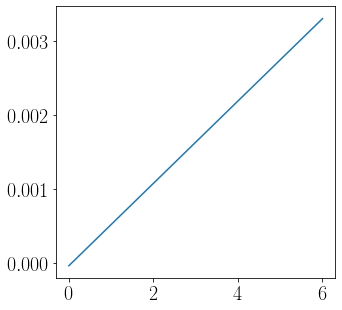

In [176]:
plt.plot(TcB[:,40,1],TcB[:,40,6])